In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df_an = pd.read_csv('data/valve2/0.csv', 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True)
df_an_fr = pd.read_csv('data/anomaly-free/anomaly-free.csv', 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True)
healthy_pref_len = 400
healthy_prefix = df_an[:healthy_pref_len]

In [37]:
healthy_prefix.describe()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.0
mean,0.027517,0.039083,0.971672,0.045693,69.348725,24.355978,230.517062,32.313201,0.0,0.0
std,0.000295,0.000968,0.269086,0.262001,0.309358,0.015867,10.529376,0.456840,0.0,0.0
min,0.026802,0.036556,0.400387,-0.601143,68.476600,24.323900,204.782000,31.036900,0.0,0.0
25%,0.027296,0.038426,0.750542,0.054711,69.155500,24.344200,224.369250,32.000000,0.0,0.0
50%,0.027535,0.039130,0.971793,0.054711,69.379500,24.353700,230.720000,32.036400,0.0,0.0
75%,0.027719,0.039834,1.203952,0.054711,69.578750,24.366675,236.741500,32.964400,0.0,0.0
max,0.028336,0.041417,1.543330,0.710565,69.993400,24.402800,254.599000,33.000000,0.0,0.0


In [38]:
df_an_fr.describe()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
count,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000
mean,0.212604,0.268407,2.403010,0.111266,89.472308,28.474310,228.647173,125.237471
std,0.004740,0.003989,0.486469,0.253332,0.667109,0.730734,10.980578,1.605327
min,0.188217,0.248062,0.855284,-1.257000,88.171300,26.850800,201.365000,118.000000
25%,0.210723,0.265510,2.129560,0.054711,88.954100,27.916700,222.623000,124.000000
50%,0.213092,0.267368,2.541890,0.054711,89.351500,28.640400,228.932000,125.677000
75%,0.215540,0.271630,2.728770,0.382638,89.861700,29.113700,234.926000,126.328000
max,0.227198,0.279921,3.241530,1.366420,91.724900,29.522100,252.806000,128.353000


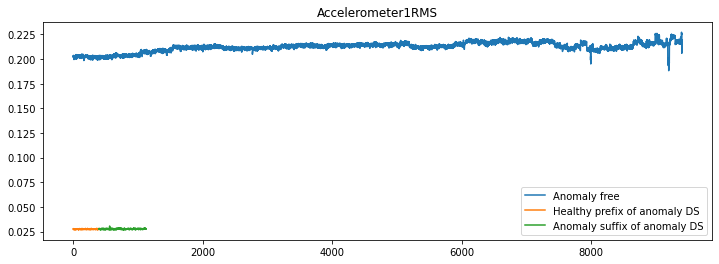

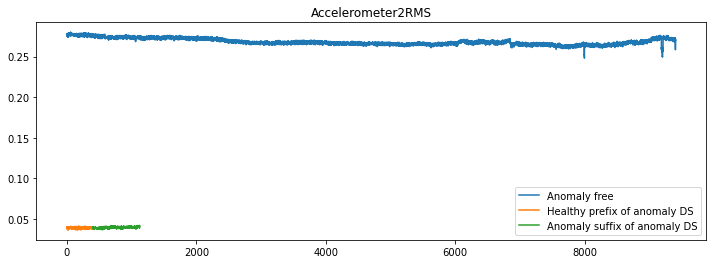

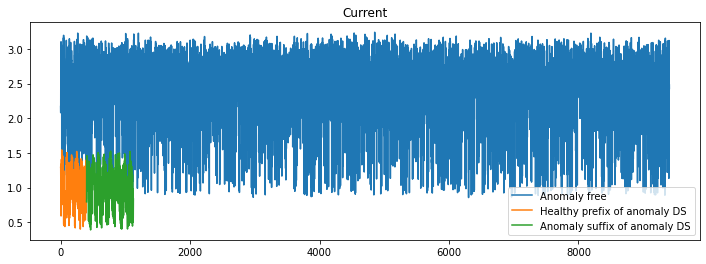

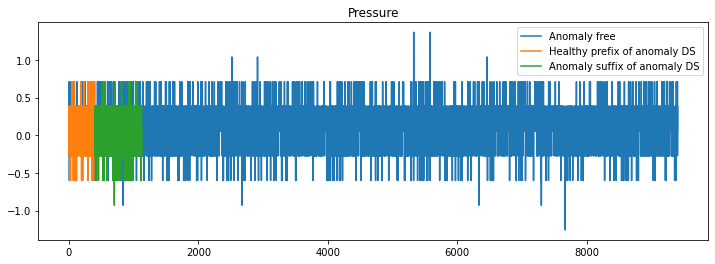

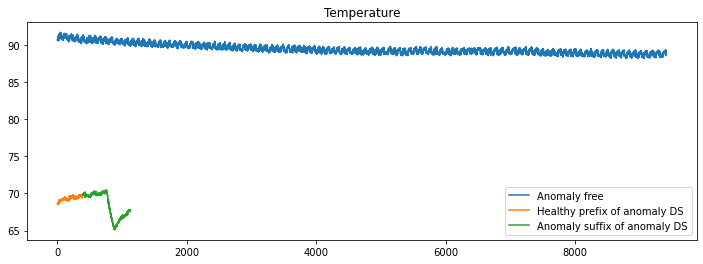

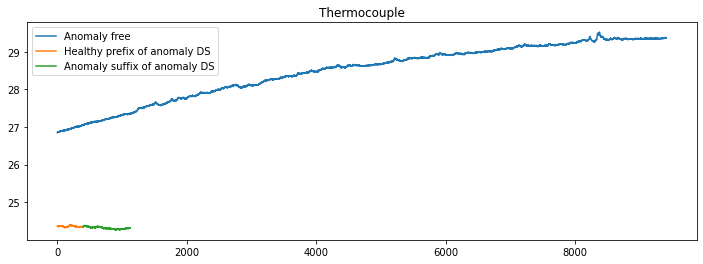

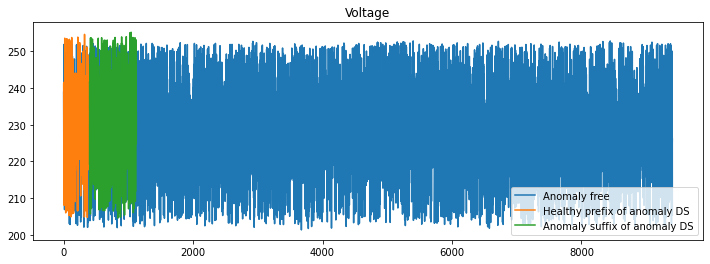

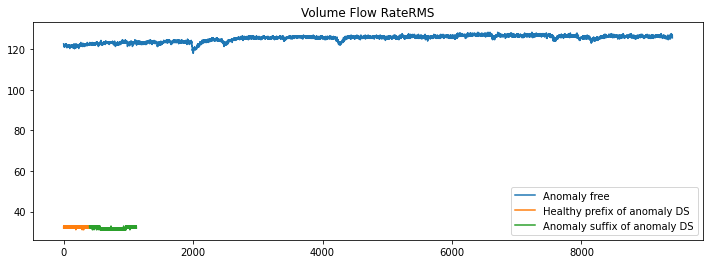

In [39]:

# anomalies_indecies = y.index[y == 1]

for c in df_an_fr.columns:
    plt.figure(figsize=(12,4))
    plt.plot(df_an_fr[c].values)
    
    with_anoml = pd.Series(df_an[c].values)
    healthy_prefix = with_anoml[:healthy_pref_len]
    rest = with_anoml[healthy_pref_len:]
    plt.plot(healthy_prefix)
    plt.plot(rest)
    
#     plt.plot(anomalies_indecies, df[c][anomalies_indecies])
    plt.legend(["Anomaly free", "Healthy prefix of anomaly DS", "Anomaly suffix of anomaly DS"])
    plt.title(c)
    plt.show()

### Вывод
Данные из anomaly-free сильно отличаются от здоровых данных из valve-1